<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-&amp;-environment" data-toc-modified-id="Dataset-&amp;-environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset &amp; environment</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#High-collinearity" data-toc-modified-id="High-collinearity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>High collinearity</a></span></li><li><span><a href="#Categorical-values" data-toc-modified-id="Categorical-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical values</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Train-and-set" data-toc-modified-id="Train-and-set-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train and set</a></span></li></ul></li><li><span><a href="#KNN" data-toc-modified-id="KNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></div>

# Dataset & environment

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [355]:
data = pd.read_csv('../datasets/kepler.csv')
data.head()

,disposition,pdisposition,orb_period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,steff,slogg,srad,right_ascension,declination,kepmag
0,CONFIRMED,CANDIDATE,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [356]:
data.groupby('disposition').count()

,pdisposition,orb_period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,steff,slogg,srad,right_ascension,declination,kepmag
disposition,,,,,,,,,,,,,,,,
CANDIDATE,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185
CONFIRMED,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
FALSE POSITIVE,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723


# Preprocessing

## High collinearity

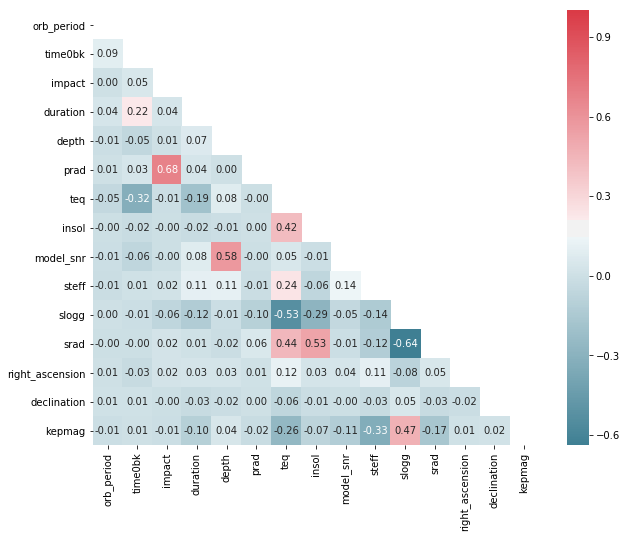

In [357]:
# Masking
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

# Heatmap
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=mask) 
plt.show()

## Categorical values
We need to one-hot encode the oject columns.  
First, we will drop the categorical columns that we don't need (names) and just leave the disposition of the KOI.

In [358]:
data.head()

,disposition,pdisposition,orb_period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,steff,slogg,srad,right_ascension,declination,kepmag
0,CONFIRMED,CANDIDATE,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [359]:
encoded = pd.get_dummies(data)

In [360]:
encoded.groupby('disposition_CONFIRMED').count()

,orb_period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,steff,slogg,srad,right_ascension,declination,kepmag,disposition_CANDIDATE,disposition_FALSE POSITIVE,pdisposition_CANDIDATE,pdisposition_FALSE POSITIVE
disposition_CONFIRMED,,,,,,,,,,,,,,,,,,,
0,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908
1,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292


## Normalization

In [361]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(encoded)
scaled_df = pd.DataFrame(scaled_df, columns=encoded.columns)
scaled_df.head()

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
# ax1.set_title('Before Scaling')
# sns.kdeplot(data['steff'], ax=ax1)
# sns.kdeplot(data['depth'], ax=ax1)
# sns.kdeplot(data['impact'], ax=ax1)
# ax2.set_title('After Min-Max Scaling')
# sns.kdeplot(encoded['steff'], ax=ax2)
# sns.kdeplot(encoded['depth'], ax=ax2)
# sns.kdeplot(encoded['impact'], ax=ax2)
# plt.show()

,orb_period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,steff,slogg,srad,right_ascension,declination,kepmag,disposition_CANDIDATE,disposition_CONFIRMED,disposition_FALSE POSITIVE,pdisposition_CANDIDATE,pdisposition_FALSE POSITIVE
0,0.000071,0.036999,0.001448,0.020980,0.000400,0.000011,0.052452,8.548941e-06,0.003954,0.211107,0.831296,0.003560,0.552473,0.733837,0.642863,0.0,1.0,0.0,1.0,0.0
1,0.000417,0.031063,0.005813,0.032169,0.000568,0.000014,0.028548,8.321493e-07,0.002849,0.211107,0.831296,0.003560,0.552473,0.733837,0.642863,0.0,1.0,0.0,1.0,0.0
2,0.000151,0.040928,0.009613,0.012494,0.007025,0.000072,0.041866,3.589843e-06,0.008427,0.241179,0.845778,0.003303,0.784346,0.733360,0.649689,0.0,0.0,1.0,0.0,1.0
3,0.000012,0.036828,0.012658,0.017001,0.005241,0.000167,0.093566,8.147573e-05,0.055838,0.237552,0.849539,0.002968,0.259826,0.742947,0.662039,0.0,0.0,1.0,0.0,1.0
4,0.000018,0.037781,0.006954,0.011571,0.000391,0.000013,0.094318,8.459972e-05,0.004517,0.254628,0.825842,0.004077,0.407085,0.739203,0.655289,0.0,1.0,0.0,1.0,0.0


## Train and set

In [362]:
scaled_df.columns

Index(['orb_period', 'time0bk', 'impact', 'duration', 'depth', 'prad', 'teq',
       'insol', 'model_snr', 'steff', 'slogg', 'srad', 'right_ascension',
       'declination', 'kepmag', 'disposition_CANDIDATE',
       'disposition_CONFIRMED', 'disposition_FALSE POSITIVE',
       'pdisposition_CANDIDATE', 'pdisposition_FALSE POSITIVE'],
      dtype='object')

In [363]:
scaled_df.drop(['disposition_CANDIDATE', 'disposition_FALSE POSITIVE'], axis=1, inplace=True)

In [364]:
scaled_df.groupby('disposition_CONFIRMED').count()

,orb_period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,steff,slogg,srad,right_ascension,declination,kepmag,pdisposition_CANDIDATE,pdisposition_FALSE POSITIVE
disposition_CONFIRMED,,,,,,,,,,,,,,,,,
0.0,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908,6908
1.0,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292


In [365]:
y = scaled_df['disposition_CONFIRMED'] # What we want to predict
X = scaled_df.drop(['disposition_CONFIRMED'], axis = 1)
#X = np.array(X)

In [366]:
print(y.shape)
print(X.shape)

(9200,)
(9200, 17)


# KNN

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n\n {}".format(y_pred))

Test set predictions:

 [0. 0. 0. ... 0. 0. 0.]


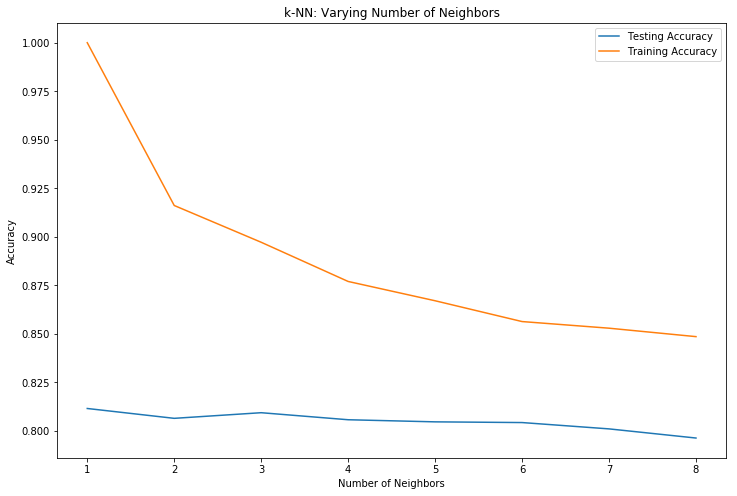

Score: 0.7963768115942029


In [368]:

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(12,8))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print(f"Score: {knn.score(X_test, y_test)}")

# Logistic Regression

In [369]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = logreg.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', confusion)
print('\nAccuracy score: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

Confusion matrix
 [[1795  281]
 [ 285  399]]

Accuracy score: 0.7949



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest

In [370]:
data = scaled_df

In [371]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [372]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [373]:
from sklearn import metrics
print("The accuracy is:",metrics.accuracy_score(y_test, y_pred))

The accuracy is: 0.908695652173913


In [374]:
metrics.confusion_matrix(y_test, y_pred)

array([[1302,  100],
       [  68,  370]])

In [375]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1402
         1.0       0.79      0.84      0.81       438

    accuracy                           0.91      1840
   macro avg       0.87      0.89      0.88      1840
weighted avg       0.91      0.91      0.91      1840

